# Python: Interazione col sistema operativo e API

- modulo `os` 
- modulo `subprocess`
- modulo `requests`
- `git` e i data repository (`github`, `gitlab`...)
- Un esempio di interfaccia: i dati governativi su COVID-$19$

## Modulo `os`
_Miscellaneous operating system interfaces_

Questo modulo introduce una serie di funzionalità generiche ma dipendenti dal sistema operativo da noi utilizzato

In [12]:
import os 

In [14]:
import os

# Controlliamo se delle cartelle sono presenti, altrimenti creiamole
directories = ['datasets','codes','backups']
filenames   = ['sample_data%d.dat'%(i+1) for i in range(10)]

for directory in directories:
    if os.path.isdir(directory): #os.path: lavora coi path
        print('Cartella %s trovata'%directory)
    else:
        os.mkdir(directory)    #os: lavora direttamente col sistema operativo che stiamo utilizzando
        print('Cartella %s creata'%directory)
        
# Run twice

Cartella datasets trovata
Cartella codes trovata
Cartella backups trovata


In [16]:
# Controlliamo se i file sono presenti, se no creiamoli
for filename in filenames:
    if os.path.isfile(filename):
        print('File %s trovato'%filename)
    else:
        open(filename,'w').close()
        print('File %s creato'%filename)
        
# Run twice

File sample_data1.dat trovato
File sample_data2.dat trovato
File sample_data3.dat trovato
File sample_data4.dat trovato
File sample_data5.dat trovato
File sample_data6.dat trovato
File sample_data7.dat trovato
File sample_data8.dat trovato
File sample_data9.dat trovato
File sample_data10.dat trovato


In [35]:
def restore_default_state(directories,filenames):
    """
    Resettiamo la work directory al suo stato iniziale
    """
    for directory in directories: 
        if os.path.isdir(directory): os.rmdir(directory)
    os.mkdir('datasets')
    os.mkdir('codes')
    
    for filename in filenames: 
        if os.path.isfile(filename): os.remove(filename)
    for filename in filenames[:4]: open(filename,'w').close()

restore_default_state(directories,filenames)

## Modulo `subprocess`
_Subprocess management_

Apre, chiude e gestisce i processi su sistema operativo (equivalente di comandi lanciati su terminale per esempio)

In [18]:
import subprocess

In [19]:
def decode_byte_literal(byte_l):
    """
    Trasforma byte literal in lista di stringhe
    """
    strings = byte_l.decode('utf-8').split('\n')
    return strings[:-1]

# Obtain information on directory contents
p = subprocess.Popen('ls',stdout=subprocess.PIPE,stderr=subprocess.PIPE,cwd='.')
b_stdout,b_stderr = p.communicate()

b_stderr
b_stdout
stdout = decode_byte_literal(b_stdout)
stdout


['Python_API_OS_draft.ipynb',
 'Untitled.ipynb',
 'backups',
 'codes',
 'datasets',
 'sample_data1.dat',
 'sample_data10.dat',
 'sample_data2.dat',
 'sample_data3.dat',
 'sample_data4.dat',
 'sample_data5.dat',
 'sample_data6.dat',
 'sample_data7.dat',
 'sample_data8.dat',
 'sample_data9.dat',
 'test_api.ipynb']

In [22]:
# Obtain additional information

p = subprocess.Popen(['ls', '-ltr'],stdout=subprocess.PIPE,stderr=subprocess.PIPE,cwd='.')
b_stdout,b_stderr = p.communicate()

b_stderr
b_stdout
stdout = decode_byte_literal(b_stdout)
stdout

['total 536',
 '-rw-r--r--@ 1 fulvio.paleari  1429829944    2405 Dec  8 15:44 test_api.ipynb',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec  8 16:33 sample_data4.dat',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec  8 16:33 sample_data3.dat',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec  8 16:33 sample_data2.dat',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec  8 16:33 sample_data1.dat',
 'drwxr-xr-x  2 fulvio.paleari  1429829944      68 Dec  8 16:33 datasets',
 'drwxr-xr-x  2 fulvio.paleari  1429829944      68 Dec  8 16:33 codes',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec  8 17:00 sample_data10.dat',
 '-rw-r--r--  1 fulvio.paleari  1429829944     555 Dec 10 13:59 Untitled.ipynb',
 'drwxr-xr-x  2 fulvio.paleari  1429829944      68 Dec 10 15:27 backups',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec 10 15:29 sample_data9.dat',
 '-rw-r--r--  1 fulvio.paleari  1429829944       0 Dec 10 15:29 sample_data8.dat',
 '-rw-r--r--  1 fulvi

## Modulo `requests`

Modulo per mandare richieste `HTTP`

In [23]:
import requests

In [25]:
response = requests.get('https://google.com/')

response
response.status_code

200

In [66]:
response.text #Questo comando permette di visualizzare il sorgente della pagina

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="it"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif" itemprop="image"><meta content="December Holidays" property="twitter:title"><meta content="December Holidays 2020 #GoogleDoodle" property="twitter:description"><meta content="December Holidays 2020 #GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-2xa.gif" property="og:image"><meta content="1100" property="og:image:width"><meta content="440" property="og:image:height"><meta content="https://www.google.c

## Interfaccia con il repository github della Protezione Civile

Interfacciamoci con il seguente [repository](https://github.com/pcm-dpc) della Presidenza del Consiglio dei Ministri - Dipartimento della Protezione Civile.

Siamo interessati al monitoraggio dell'epidemia da COVID-$19$. I relativi dataset sono conservati a [questo indirizzo](https://github.com/pcm-dpc/COVID-19) all'interno del repository github.

Da qui possiamo accedere al dataset relativo all'andamento nazionale dell'epidemia accedendo alla corrispondente directory e poi, visionando la lista file, cliccando sull'ultimo in ordine di tempo per vedere il più aggiornato ([questo](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv) al momento della composizione di questo notebook).

Cliccando sul pulsante `Raw` accediamo all'indirizzo a cui sono caricati i dati in [formato grezzo](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv).

In particolare, questo formato grezzo è il `csv`, facilmente leggibile e lavorabile con python - ad esempio utilizzando la libreria `pandas`. 
 


In [68]:
RAW_data='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

In [26]:
# Interfaccia con subprocess: 
# Usiamo subprocess per lanciare il processo 'wget' da terminale che permette di scaricare il csv sul nostro computer.
import subprocess

def decode_byte_literal(byte_l):
    """
    Trasforma byte literal in lista di stringhe
    """
    strings = byte_l.decode('utf-8').split('\n')
    return strings[:-1]


p = subprocess.Popen(['wget',RAW_data],stdout=subprocess.PIPE,stderr=subprocess.PIPE,cwd='.')
b_stdout,b_stderr = p.communicate()

stderr = decode_byte_literal(b_stderr)
stderr

['--2020-12-10 15:55:07--  https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.240.133',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.240.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 31862 (31K) [text/plain]',
 "Saving to: 'dpc-covid19-ita-andamento-nazionale.csv'",
 '',
 '     0K .......... .......... .......... .                    100% 8.46M=0.004s',
 '',
 "2020-12-10 15:55:07 (8.46 MB/s) - 'dpc-covid19-ita-andamento-nazionale.csv' saved [31862/31862]",
 '']

In [27]:
def parse_wget_stderr(stderr):
    """Get csv file name from stderr of wget
    """
    for string in stderr:
        if 'Saving to: ' in string: 
            print(string)
            return string[len('Saving to:  '):-1] #Rimuoviamo anche gli apici "'" contenuti nella stringa

csv_file_name = parse_wget_stderr(stderr)
csv_file_name

Saving to: 'dpc-covid19-ita-andamento-nazionale.csv'


'dpc-covid19-ita-andamento-nazionale.csv'

In [28]:
import pandas as pd

covid_data = pd.read_csv(csv_file_name,index_col='data')
covid_data

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
data,,,,,,,,,,,,,,,,,,,
2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN
2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,NaN,NaN,1128,18661,NaN,NaN,NaN,NaN,NaN
2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,NaN,NaN,1694,21127,NaN,NaN,NaN,NaN,NaN
2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,NaN,NaN,2036,23345,NaN,NaN,NaN,NaN,NaN
2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,NaN,NaN,2502,25856,NaN,NaN,NaN,NaN,NaN


In [29]:
# Interfaccia con requests: recuperiamo il csv da leggere con una richiesta HTTPS.
import requests
import io # Modulo aggiuntivo

response = requests.get(RAW_data)

csv_file_text = io.StringIO(response.text) # Convertiamo response.text in un oggetto IO più generale leggibile da pandas

covid_data = pd.read_csv(csv_file_text,index_col='data')
covid_data

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
data,,,,,,,,,,,,,,,,,,,
2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN
2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,NaN,NaN,1128,18661,NaN,NaN,NaN,NaN,NaN
2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,NaN,NaN,1694,21127,NaN,NaN,NaN,NaN,NaN
2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,NaN,NaN,2036,23345,NaN,NaN,NaN,NaN,NaN
2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,NaN,NaN,2502,25856,NaN,NaN,NaN,NaN,NaN


In [30]:
# Bonus: lettura direttamente da pandas
import pandas as pd

covid_data = pd.read_csv(RAW_data,index_col='data')
covid_data

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
data,,,,,,,,,,,,,,,,,,,
2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN
2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,NaN,NaN,1128,18661,NaN,NaN,NaN,NaN,NaN
2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,NaN,NaN,1694,21127,NaN,NaN,NaN,NaN,NaN
2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,NaN,NaN,2036,23345,NaN,NaN,NaN,NaN,NaN
2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,NaN,NaN,2502,25856,NaN,NaN,NaN,NaN,NaN


Facciamo un semplice plot del totale positivi giornalieri con le impostazioni di default (da sistemare come esercizio).

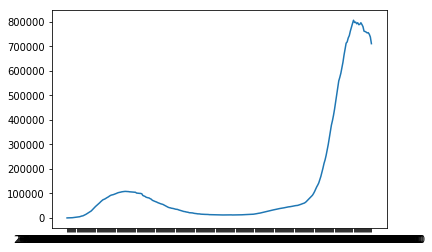

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

RAW_data='https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_data = pd.read_csv(RAW_data)

date = covid_data['data']
tot_positivi = covid_data['totale_positivi']

plt.plot(date,tot_positivi)
plt.show()